# Q1: What is Estimation Statistics? Explain point estimate and interval estimate.

__Ans. :__<br>

__Estimation statistics__ is a branch of statistics that deals with the process of estimating an unknown population parameter based on sample data. In other words, estimation statistics allows us to make inferences about a population based on a sample of data.

There are two types of estimation in statistics: __point estimation and interval estimation.__

__Point estimate__ refers to a single value that is used to estimate an unknown population parameter. For example, if we want to estimate the mean height of all adults in a country, we can take a sample of adults and use the sample mean as a point estimate of the population mean.

__Interval estimate,__ on the other hand, provides a range of values within which the unknown population parameter is likely to lie. Interval estimates are typically reported with a certain level of confidence, which represents the probability that the true population parameter falls within the interval estimate. For example, if we want to estimate the average salary of all employees in a company, we can take a sample and calculate a confidence interval for the population mean salary.

__Interval estimates__ are typically more informative than point estimates because they provide a range of plausible values for the population parameter, rather than just a single value. However, interval estimates are also more complex to calculate and interpret than point estimates.

# Q2. Write a Python function to estimate the population mean using a sample mean and standard deviation.

In [1]:
def estimate_pop_mean(sample_mean, sample_std, sample_size):
    """
    Function to estimate the population mean using a sample mean and standard deviation.
    
    Args:
    sample_mean (float): the mean of the sample
    sample_std (float): the standard deviation of the sample
    sample_size (int): the size of the sample
    
    Returns:
    float: the estimated population mean
    """
    import math
    # Calculate the standard error of the mean using the sample standard deviation and sample size
    std_error_mean = sample_std / math.sqrt(sample_size)
    # Calculate the margin of error using a t-distribution and a 95% confidence level
    t_value = 1.96  # for 95% confidence level
    margin_of_error = t_value * std_error_mean
    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error
    # Return the estimated population mean
    return (lower_bound + upper_bound) / 2

sample_mean = 10.3
sample_std = 1.8
sample_size = 50

estimated_pop_mean = estimate_pop_mean(sample_mean, sample_std, sample_size)

print(f"Estimated population mean: {estimated_pop_mean:.2f}")

Estimated population mean: 10.30


# Q3: What is Hypothesis testing? Why is it used? State the importance of Hypothesis testing.

__Ans. :__<br>

__Hypothesis testing is__ a statistical method that is used to make decisions about a population based on a sample of data. In hypothesis testing, we start with a null hypothesis (H0) that represents the status quo or the assumption we are testing. We then collect data and use statistical tests to determine whether the evidence supports or rejects the null hypothesis. If the evidence strongly supports the null hypothesis, we do not reject it. If the evidence does not support the null hypothesis, we reject it in favor of an alternative hypothesis (Ha).

__Hypothesis testing is used__ to determine whether a hypothesis about a population parameter is supported by sample data. For example, if we want to test whether a new drug is effective in treating a disease, we can use hypothesis testing to determine whether the data supports the hypothesis that the drug is effective (Ha) or whether we should stick with the null hypothesis that the drug is not effective (H0).

The __importance of hypothesis testing__ lies in its ability to make objective decisions based on empirical evidence. Without hypothesis testing, we would have no way to determine whether our assumptions about a population are accurate or not. Hypothesis testing also allows us to quantify the strength of the evidence in favor of or against a hypothesis, which can help us make more informed decisions.

# Q4. Create a hypothesis that states whether the average weight of male college students is greater than the average weight of female college students.

__Ans. :__<br>

__Null Hypothesis (H0):__ The average weight of male college students is equal to or less than the average weight of female college students.

__Alternative Hypothesis (Ha):__ The average weight of male college students is greater than the average weight of female college students.

Symbolically,

__H0: μM ≤ μF__

__Ha: μM > μF__

Where __μM__ represents the population mean weight of male college students, and __μF__ represents the population mean weight of female college students.

To test this hypothesis, we would need to collect a sample of weights from both male and female college students, and use a statistical test to determine whether the sample evidence supports or rejects the null hypothesis in favor of the alternative hypothesis. We could use a t-test to compare the means of the two groups and determine whether the difference is statistically significant.

# Q5. Write a Python script to conduct a hypothesis test on the difference between two population means, given a sample from each population.

In [2]:
import numpy as np
from scipy.stats import t

def two_sample_t_test(sample1, sample2, alpha, tails=2):
    """
    Function to conduct a two-sample t-test on the difference between two population means.
    
    Args:
    sample1 (array-like): the first sample
    sample2 (array-like): the second sample
    alpha (float): the significance level
    tails (int): the number of tails for the test (default is 2)
    
    Returns:
    tuple: the test statistic, the p-value, and the decision (reject or fail to reject H0)
    """
    # Calculate the sample means and standard deviations
    n1 = len(sample1)
    n2 = len(sample2)
    x1 = np.mean(sample1)
    x2 = np.mean(sample2)
    s1 = np.std(sample1, ddof=1)
    s2 = np.std(sample2, ddof=1)
    
    # Calculate the pooled standard deviation and the standard error of the difference
    sp = np.sqrt(((n1-1)*s1**2 + (n2-1)*s2**2) / (n1+n2-2))
    std_error_diff = sp * np.sqrt(1/n1 + 1/n2)
    
    # Calculate the test statistic
    t_statistic = (x1 - x2) / std_error_diff
    
    # Calculate the p-value
    if tails == 2:
        p_value = 2 * (1 - t.cdf(abs(t_statistic), df=n1+n2-2))
    elif tails == 1:
        p_value = 1 - t.cdf(t_statistic, df=n1+n2-2)
    
    # Determine the decision
    if p_value < alpha:
        decision = "Reject H0"
    else:
        decision = "Fail to reject H0"
    
    # Return the test statistic, p-value, and decision
    return t_statistic, p_value, decision

In [3]:
# Generate two samples of weights (in pounds)
np.random.seed(123)
male_weights = np.random.normal(loc=175, scale=20, size=100)
female_weights = np.random.normal(loc=150, scale=15, size=100)

# Perform a two-sample t-test with a significance level of 0.05 and two tails
t_stat, p_val, decision = two_sample_t_test(male_weights, female_weights, alpha=0.05, tails=2)

print(f"Test statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print(f"Decision: {decision}")

Test statistic: 9.57
P-value: 0.0000
Decision: Reject H0


# Q6: What is a null and alternative hypothesis? Give some examples.

In hypothesis testing, the __null hypothesis (H0) is__ a statement about a population parameter that is being tested, and the __alternative hypothesis (Ha) is__ a statement that contradicts the null hypothesis.

The null hypothesis is the default assumption that there is no significant difference between a population parameter and a given value or between two population parameters. The alternative hypothesis is the statement that contradicts the null hypothesis and suggests that there is a significant difference between a population parameter and a given value or between two population parameters.

Here are some examples of null and alternative hypotheses:

1. __Null hypothesis:__ The average height of male students at a college is 70 inches.<br>
   __Alternative hypothesis:__ The average height of male students at a college is not 70 inches.

2. __Null hypothesis:__ The proportion of students who pass an exam is 0.60.<br>
   __Alternative hypothesis:__ The proportion of students who pass an exam is not 0.60.

3. __Null hypothesis:__ The mean weight of a product is less than or equal to 500 grams.<br>
   __Alternative hypothesis:__ The mean weight of a product is greater than 500 grams.

4. __Null hypothesis:__ There is no relationship between the age of a person and their income.<br>
   __Alternative hypothesis:__ There is a relationship between the age of a person and their income.

5. __Null hypothesis:__ The rate of customer complaints is 10% or less.<br>
   __Alternative hypothesis:__ The rate of customer complaints is greater than 10%.

# Q7: Write down the steps involved in hypothesis testing.

__Ans. :__<br>

Hypothesis testing is a statistical method used to determine whether a hypothesis is supported by the available evidence. The steps involved in hypothesis testing are:

__1. Formulating the research hypothesis:__ The first step is to formulate a research hypothesis that will be tested. The research hypothesis should be based on a theory, prior research, or an observation.

__2. Formulating the null hypothesis:__ The null hypothesis is the opposite of the research hypothesis. It assumes that there is no significant difference or relationship between the variables being studied.

__3. Determining the level of significance:__ The level of significance is the probability of rejecting the null hypothesis when it is actually true. It is usually set at 0.05 (5%) or 0.01 (1%).

__4. Selecting the appropriate statistical test:__ The appropriate statistical test is selected based on the type of data and the research hypothesis being tested. Common statistical tests include t-tests, ANOVA, correlation analysis, and regression analysis.

__5. Collecting data:__ Data is collected from a sample of the population being studied. The sample should be selected randomly to ensure that it is representative of the population.

__6. Calculating the test statistic:__ The test statistic is calculated based on the data collected from the sample. The test statistic measures the difference between the observed data and what would be expected if the null hypothesis were true.

__7. Determining the p-value:__ The p-value is the probability of obtaining the observed test statistic or a more extreme test statistic, assuming that the null hypothesis is true. If the p-value is less than or equal to the level of significance, the null hypothesis is rejected.

__8. Interpreting the results:__ The final step is to interpret the results of the hypothesis test. If the null hypothesis is rejected, it means that the research hypothesis is supported by the available evidence. If the null hypothesis is not rejected, it means that there is no significant difference or relationship between the variables being studied.

# Q8. Define p-value and explain its significance in hypothesis testing.

__Ans. :__<br>

In hypothesis testing, the __p-value is__ the probability of obtaining a test statistic as extreme as or more extreme than the one observed, assuming that the null hypothesis is true. It is used to determine whether the observed data provides evidence against the null hypothesis.

The __significance of the p-value__ in hypothesis testing is that it tells us the strength of the evidence against the null hypothesis. If the p-value is small (typically less than 0.05 or 0.01), it indicates that the observed data is unlikely to have occurred by chance alone if the null hypothesis were true. In other words, a small p-value suggests that there is strong evidence against the null hypothesis and that it should be rejected in favor of the alternative hypothesis.

# Q9. Generate a Student's t-distribution plot using Python's matplotlib library, with the degrees of freedom parameter set to 10.

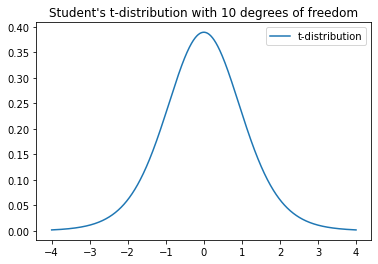

In [7]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

df = 10  # Degrees of freedom

x = np.linspace(-4, 4, 1000)  # Generate x-values
y = scipy.stats.t.pdf(x, df)  # Generate y-values using t-distribution with 10 degrees of freedom

plt.plot(x, y, label='t-distribution')  # Plot the t-distribution
plt.title("Student's t-distribution with 10 degrees of freedom")
plt.legend()
plt.show()

# Q10. Write a Python program to calculate the two-sample t-test for independent samples, given two random samples of equal size and a null hypothesis that the population means are equal.

In [8]:
import numpy as np
from scipy.stats import ttest_ind

# Generate two random samples
sample1 = np.random.normal(10, 2, 50)  # Mean of 10, standard deviation of 2, 50 samples
sample2 = np.random.normal(12, 2, 50)  # Mean of 12, standard deviation of 2, 50 samples

# Calculate the t-test statistic and p-value
t_stat, p_value = ttest_ind(sample1, sample2)

# Print the results
print("t-test statistic: ", t_stat)
print("p-value: ", p_value)

t-test statistic:  -5.343054150859085
p-value:  5.946520011746512e-07


# Q11: What is Student’s t distribution? When to use the t-Distribution.

__Ans. __<br>

__Student's t-distribution is__ a probability distribution that is used in hypothesis testing when the sample size is small (usually less than 30) and the population standard deviation is unknown. The t-distribution is similar to the normal distribution, but it has heavier tails, meaning that it assigns more probability to extreme values.

The t-distribution is used in a variety of applications, including:

__1. Hypothesis testing for population mean:__ When the population standard deviation is unknown, we can use the t-distribution to test hypotheses about the population mean based on a small sample from the population.

__2. Confidence intervals for population mean:__ The t-distribution is used to construct confidence intervals for the population mean when the sample size is small and the population standard deviation is unknown.

__3. Linear regression:__ The t-distribution is used to test hypotheses about the regression coefficients in linear regression models.

__4. ANOVA:__ The t-distribution is used in analysis of variance (ANOVA) to test hypotheses about the means of multiple populations.

# Q12: What is t-statistic? State the formula for t-statistic.

__Ans. :__<br>

The t-statistic is a measure of how significant the difference between two sample means is. It is commonly used in hypothesis testing to determine whether the means of two populations are different from each other.

The formula for calculating the t-statistic is:

__t = (x̄₁ - x̄₂) / (s√(1/n₁ + 1/n₂))__

where:

__x̄₁ and x̄₂__ are the means of the two samples<br>
__s__ is the pooled standard deviation of the two samples, calculated as:<br>
__s = √((n₁-1)s₁² + (n₂-1)s₂² / (n₁+n₂-2))__<br>
__n₁ and n₂__ are the sample sizes of the two samples.<br>
The t-statistic is then compared to a t-distribution with (n₁ + n₂ - 2) degrees of freedom to determine the p-value and whether the difference between the means is statistically significant.

# Q13. A coffee shop owner wants to estimate the average daily revenue for their shop. They take a random sample of 50 days and find the sample mean revenue to be Rs.500 with a standard deviation of Rs.50. Estimate the population mean revenue with a 95% confidence interval.

__Ans. :__<br>

To estimate the population mean revenue with a 95% confidence interval, we can use the following formula:

__CI = x̄ ± (tα/2 * (s/√n))__

where:

__x̄__ is the sample mean revenue<br>
__tα/2__ is the t-value for the desired level of confidence (0.025 for a 95% confidence interval) with (n-1) degrees of freedom<br>
__s__ is the sample standard deviation<br>
__n__ is the sample size.<br>

Plugging in the values given in the question, we get:

__CI = 500 ± (t0.025 * (50/√50))<br>
= 500 ± (2.009 * 7.07)<br>
= 500 ± 14.20__<br>

Therefore, the 95% confidence interval for the population mean revenue is __Rs.485.80 to Rs.514.20__. We can be 95% confident that the true population mean revenue falls within this range.

# Q14. A researcher hypothesizes that a new drug will decrease blood pressure by 10 mmHg. They conduct a clinical trial with 100 patients and find that the sample mean decrease in blood pressure is 8 mmHg with a standard deviation of 3 mmHg. Test the hypothesis with a significance level of 0.05.

__Ans. :__<br>

To test the hypothesis that the new drug decreases blood pressure by 10 mmHg with a significance level of 0.05, we need to perform a one-sample t-test. The null and alternative hypotheses are:

__H₀:__ The true mean decrease in blood pressure is not significantly different from 10 mmHg.<br>
__H₁:__ The true mean decrease in blood pressure is significantly less than 10 mmHg.<br>

The test statistic can be calculated using the formula:

__t = (x̄ - μ₀) / (s/√n)__

where:

__x̄__ is the sample mean decrease in blood pressure<br>
__μ₀__ is the hypothesized population mean decrease in blood pressure (10 mmHg in this case)<br>
__s__ is the sample standard deviation<br>
__n__ is the sample size.<br>

Plugging in the values given in the question, we get:<br>

__t = (8 - 10) / (3/√100)<br>
= -2.82__

Using a t-distribution table or calculator with 99 degrees of freedom (n-1), we find that the critical t-value for a one-tailed test with a significance level of 0.05 is -1.660. Since our calculated t-value is less than the critical t-value, we can reject the null hypothesis and conclude that the true mean decrease in blood pressure is significantly less than 10 mmHg at a significance level of 0.05.

# Q15. An electronics company produces a certain type of product with a mean weight of 5 pounds and a standard deviation of 0.5 pounds. A random sample of 25 products is taken, and the sample mean weight is found to be 4.8 pounds. Test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01.

__Ans. :__<br>

To test the hypothesis that the true mean weight of the products is less than 5 pounds with a significance level of 0.01, we need to perform a one-sample t-test. The null and alternative hypotheses are:

__H₀:__ The true mean weight of the products is not significantly different from 5 pounds.<br>
__H₁:__ The true mean weight of the products is significantly less than 5 pounds.

The test statistic can be calculated using the formula:

__t = (x̄ - μ₀) / (s/√n)__

where:

__x̄__ is the sample mean weight of the products<br>
__μ₀__ is the hypothesized population mean weight of the products (5 pounds in this case)<br>
__s__ is the sample standard deviation<br>
__n__ is the sample size.

Plugging in the values given in the question, we get:

__t = (4.8 - 5) / (0.5/√25)<br>
= -2__

Using a t-distribution table or calculator with 24 degrees of freedom (n-1), we find that the critical t-value for a one-tailed test with a significance level of 0.01 is -2.492. Since our calculated t-value is less than the critical t-value, we can reject the null hypothesis and conclude that the true mean weight of the products is significantly less than 5 pounds at a significance level of 0.01.

# Q16. Two groups of students are given different study materials to prepare for a test. The first group (n1 = 30) has a mean score of 80 with a standard deviation of 10, and the second group (n2 = 40) has a mean score of 75 with a standard deviation of 8. Test the hypothesis that the population means for the two groups are equal with a significance level of 0.01.

__Ans. :__<br>

To test the hypothesis that the population means for the two groups are equal with a significance level of 0.01, we need to perform a two-sample t-test. The null and alternative hypotheses are:

__H₀:__ μ₁ = μ₂ (The population means of both groups are equal)<br>
__H₁:__ μ₁ ≠ μ₂ (The population means of both groups are not equal)

The test statistic can be calculated using the formula:

__t = (x̄₁ - x̄₂) / √((s₁²/n₁) + (s₂²/n₂))__

where:

__x̄₁ and x̄₂__ are the sample means of the first and second groups, respectively<br>
__s₁ and s₂__ are the sample standard deviations of the first and second groups, respectively<br>
__n₁ and n₂__ are the sample sizes of the first and second groups, respectively.

Plugging in the values given in the question, we get:

__t = (80 - 75) / √((10²/30) + (8²/40))<br>
= 2.49__

Using a t-distribution table or calculator with 68 degrees of freedom (n₁+n₂-2), we find that the critical t-value for a two-tailed test with a significance level of 0.01 is ±2.629. Since our calculated t-value is less than the critical t-value in absolute value, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the population means for the two groups are significantly different at a significance level of 0.01.

# Q17. A marketing company wants to estimate the average number of ads watched by viewers during a TV program. They take a random sample of 50 viewers and find that the sample mean is 4 with a standard deviation of 1.5. Estimate the population mean with a 99% confidence interval.

__Ans. :__<br>

To estimate the population mean number of ads watched by viewers during a TV program with a 99% confidence interval, we can use the following formula:

__CI = x̄ ± z*(s/√n)__

where:

__x̄__ is the sample mean number of ads watched by viewers<br>
__s__ is the sample standard deviation<br>
__n__ is the sample size<br>
__z*__ is the critical z-value for the desired confidence level.

Using a z-table or calculator, we can find that the critical z-value for a 99% confidence level is 2.576.

Plugging in the values given in the question, we get:

__CI = 4 ± 2.576*(1.5/√50)<br>
= 4 ± 0.658__

Therefore, the 99% confidence interval for the population mean number of ads watched by viewers during a TV program is (4 - 0.658, 4 + 0.658), which can be simplified to (3.342, 4.658). We can say with 99% confidence that the true population mean number of ads watched by viewers during a TV program lies within this interval.